### LSTM Example

Here i am writing an example pipeline for training and testing a LSTM model

In [1]:
%load_ext autoreload

In [365]:
# reloading modules after modifying code
%autoreload

In [2]:
import sys, os
import pandas as pd
import polars as pl
import numpy as np
from dotenv import load_dotenv

sys.path.append('/Users/katringrunert/Projects/Uni/thesis/neuro-symbolic-demand-forecasting')
# when running on JupyterHub the dot-env-path needs to be adapted
load_dotenv("../.env")

datetime_format = "%Y-%m-%d %H:%M%z"

In [5]:
from src.neuro_symbolic_demand_forecasting.database.weather_postgres import WeatherDao
from src.neuro_symbolic_demand_forecasting.database.snowflake import SnowflakeDao


sf_dao = SnowflakeDao(
    url=os.getenv("SNOWFLAKE_URL"),
    uid=os.getenv("SNOWFLAKE_UID"),
    pwd=os.getenv("SNOWFLAKE_PASSWORD"),
    database=os.getenv("SNOWFLAKE_DATABASE"),
    schema=os.getenv("SNOWFLAKE_SCHEMA"),
)
pg_dao = WeatherDao(
    url=os.getenv("POSTGRES_HOST_WEATHER_DATA"),
    uid=os.getenv("POSTGRES_UID_WEATHER_DATA"),
    pwd=os.getenv("POSTGRES_PASSWORD_WEATHER_DATA"),
    database=os.getenv("POSTGRES_DATABASE_WEATHER_DATA"),
    schema=os.getenv("POSTGRES_SCHEMA_WEATHER_DATA"),
    port=int(os.getenv("POSTGRES_PORT_WEATHER_DATA"))
)
sf_dao.connect()
pg_dao.connect()

Connected to snowflake instance!
Connected to postgres host!


In [6]:
contract_df = sf_dao.fetch_list("SELECT * FROM SANDBOX.KATRIN.CONTRACT_DATA")
contract_df

Executing query
Writing data to df


clusterreference,degreeofisolation,hassolarpanels,solarpanelswattpeak,surfacearea,typeofhouse,yearbuilt,numberofpeople,connection_id,ean,ean_sha256,previous_contract_id,contract_id,initial_contract_id,parent_contract_id,contract_start_date,contract_end_date,contract_state,pricing_type,market_segment,connection_group_id,customer_size,zip_code,city,zip_code_suffixed,last_modified
str,str,bool,f64,str,str,str,str,str,str,str,str,str,str,str,datetime[ns],datetime[ns],str,str,str,str,str,str,str,str,datetime[ns]
"""1115GD50""","""Average""",true,0.0,"""From100""","""RowHouse""","""From1975""","""FiveOrMore""","""68ce711c-9591-…","""87168590000933…","""d2f040441a8acd…","""0af1e053-ca98-…","""448260f8-6d06-…","""da881f3d-23d2-…","""448260f8-6d06-…",2021-04-03 00:00:00,2024-04-03 00:00:00,"""Active""","""Fixed""","""Electricity""","""c4d6d8b3-5e64-…","""Small""","""1115""","""DUIVENDRECHT""","""1115 GD""",2024-03-28 12:03:53
"""6581CV14""","""Average""",true,1650.0,"""From150""","""SemiDetached""","""From1965""","""Four""","""17a34041-7cf5-…","""87168712005393…","""7378f311a78a6a…","""76579388-3d66-…","""d10b02e1-e619-…","""76579388-3d66-…","""d10b02e1-e619-…",2021-11-17 00:00:00,2024-11-17 00:00:00,"""Active""","""Fixed""","""Electricity""","""c237f756-1934-…","""Small""","""6581""","""MALDEN""","""6581 CV""",2024-03-28 12:03:53
"""2693EA117""","""Good""",true,2880.0,"""From100""","""RowHouse""","""From2015""","""Four""","""f2f0b7b6-0166-…","""87168780000164…","""a8e16072cbc843…",null,"""d0580984-1693-…","""d0580984-1693-…","""d0580984-1693-…",2021-05-16 00:00:00,2024-05-16 00:00:00,"""Active""","""Fixed""","""Electricity""","""eea5f333-513d-…","""Small""","""2693""","""'S-GRAVENZANDE…","""2693 EA""",2024-03-28 12:03:53
"""9651CN7""","""Average""",true,18.0,"""From100""","""Detached""","""Until1945""","""Two""","""75e3c479-2b91-…","""87169484000471…","""6d9427b80268e4…","""31392f24-87f5-…","""5a7af430-3586-…","""5f49c6c2-2e21-…","""5a7af430-3586-…",2021-09-21 00:00:00,2024-09-21 00:00:00,"""Active""","""Fixed""","""Electricity""","""2c39d841-b4e0-…","""Small""","""9651""","""MEEDEN""","""9651 CN""",2024-03-28 12:03:53
"""1602JB17""","""Good""",true,3000.0,"""From100""","""CornerHouse""","""From1975""","""Two""","""65bfaff3-fb48-…","""87168590000451…","""955668d647fe7c…","""935de9fd-c8a0-…","""4d5fadc8-f660-…","""8dc04ec1-dbdf-…","""4d5fadc8-f660-…",2021-11-27 00:00:00,2024-11-27 00:00:00,"""Active""","""Fixed""","""Electricity""","""0c5d50b7-7acb-…","""Small""","""1602""","""ENKHUIZEN""","""1602 JB""",2024-03-28 12:03:53
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""6824BG47-402""","""Good""",false,0.0,"""From50""","""Apartment""","""From2015""","""One""","""dc6a400a-bee8-…","""87168711000392…","""9a34265969c949…",null,"""28c2891a-6fdb-…","""28c2891a-6fdb-…","""28c2891a-6fdb-…",2021-06-07 00:00:00,2024-06-07 00:00:00,"""Active""","""Fixed""","""Electricity""","""3268ee71-efd9-…","""Small""","""6824""","""ARNHEM""","""6824 BG""",2024-03-28 12:03:53
"""3448CA5""","""Poor""",false,0.0,"""From15""","""Apartment""","""From1975""","""One""","""8f779647-e29a-…","""87168740000541…","""1803c7ac5248ba…","""d7e3e173-16f7-…","""ef25d703-6aad-…","""379c8d31-0002-…","""ef25d703-6aad-…",2021-06-08 00:00:00,2024-06-08 00:00:00,"""Active""","""Fixed""","""Electricity""","""8fb15b1c-c2de-…","""Small""","""3448""","""WOERDEN""","""3448 CA""",2024-03-28 12:03:53
"""6462GT37""","""Average""",false,0.0,"""From50""","""Apartment""","""From1975""","""One""","""e5ca7e4a-4e56-…","""87168854000338…","""a6773471e60dab…",null,"""c3ffe820-1ef8-…","""c3ffe820-1ef8-…","""c3ffe820-1ef8-…",2021-06-01 00:00:00,2024-06-01 00:00:00,"""Active""","""Fixed""","""Electricity""","""6bdba9cf-d4cc-…","""Small""","""6462""","""KERKRADE""","""6462 GT""",2024-03-28 12:03:53


In [7]:
from src.neuro_symbolic_demand_forecasting.helpers.constants import P4_TS_SUMMER

start, end = "2023-05-01 00:00+02:00", "2023-06-01 00:00+02:00"
columns = "EAN_SHA256, LDN, ODN, READINGDATE, LDN_DIFF, ODN_DIFF"
df = sf_dao.fetch_list(f"SELECT {columns} FROM {P4_TS_SUMMER} WHERE READINGDATE>='{start}' AND READINGDATE<='{end}' ORDER BY READINGDATE ASC;")
df.head()

Executing query
Writing data to df


ean_sha256,ldn,odn,readingdate,ldn_diff,odn_diff
str,f64,f64,"datetime[ns, Etc/GMT-2]",f64,f64
"""7C30182C5DFA03…",3.6154976e7,6.273262e6,2023-05-01 00:00:00 +02,null,null
"""EFAEB00B3BE5AD…",5.283498e6,0.0,2023-05-01 00:00:00 +02,null,null
"""93FE02F7588379…",7.692142e6,566.0,2023-05-01 00:00:00 +02,null,null
"""227B46E474C151…",8.507966e6,3.660197e6,2023-05-01 00:00:00 +02,null,null
"""3DAE87B55F836C…",4.248353e6,2.737515e6,2023-05-01 00:00:00 +02,null,null


## Finding missing data

In [8]:
min_length = (df['readingdate'].max() - df['readingdate'].min()).days * 24 * 4

missing_points = pl.DataFrame()
for key, group  in df.group_by(['ean_sha256']):
    if len(group) < min_length:
        missing_points = pl.concat([missing_points, group])

missing_points

ean_sha256,ldn,odn,readingdate,ldn_diff,odn_diff
str,f64,f64,"datetime[ns, Etc/GMT-2]",f64,f64
"""4FD991AD2D6F44…",1.4275984e7,0.0,2023-05-01 00:00:00 +02,null,null
"""4FD991AD2D6F44…",1.4276014e7,0.0,2023-05-01 00:15:00 +02,30.0,0.0
"""4FD991AD2D6F44…",1.4276053e7,0.0,2023-05-01 00:30:00 +02,39.0,0.0
"""4FD991AD2D6F44…",1.4276081e7,0.0,2023-05-01 00:45:00 +02,28.0,0.0
"""4FD991AD2D6F44…",1.4276114e7,0.0,2023-05-01 01:00:00 +02,33.0,0.0
…,…,…,…,…,…
"""F982BC63021ADF…",3.9943421e7,0.0,2023-05-31 23:00:00 +02,41.0,0.0
"""F982BC63021ADF…",3.9943459e7,0.0,2023-05-31 23:15:00 +02,38.0,0.0
"""F982BC63021ADF…",3.9943494e7,0.0,2023-05-31 23:30:00 +02,35.0,0.0


## Analyzing nature of missing data points

In [28]:
for key, group  in missing_points.group_by(['ean_sha256']):
    if len(group) < 2700:
        print(key, len(group))

('9947B75B76975180FCCF800EFC1F7F00FA931F6C727C8935E499D8F7B7C901F4',) 1672
('BA003593839DE495AE8DCA6532208499E77F74D0B06832AB1687181EA75506E6',) 1606
('9EEF3C7C53E4BCA2371CE7A5AF12E3B262BCEA21E4A15B644FB2629EA7788CE2',) 2599
('BB432A4ACB7E0BA968BE2F6515B292850EC0F383EDAEE012E4D1DC09370BB734',) 740
('D947C193F9765B799432D9FC8C39EAB5279DE1BF754AFA38638DA22CECD72D8C',) 2596
('7E099A1AE5175A25FCDE4F4EE6775BB1FBB1FCAA448694750272F74EFE4FE184',) 2658
('83EE45AA9A4367301D9B33E016876CC7060C8D00CA0697B5333A664905FE3BD3',) 2497
('A29C6CC632554B30F99C45B9D679DE9A9C8DF37CAA52359A04971FD6BDEC7C76',) 2664
('0A1E4B6051265F5688D930431E4A4549139319C8DA5F16BA8EB7302D73DBE36D',) 1604
('14438004DB2EF198408C065F920BDA7E4CA860B90F5CD06A39D090D316865626',) 2577
('06B05E8F1C40D41CD004FC698F438D46434DD87269A0B2B2791D4BDECFB8763D',) 2515
('CFAC4A117D8D9DBF8F7E63EDD8D6C7E734F8E708C4716416EB0C72D5B932151D',) 2340
('8CEBDF94FA49CEF7781330C2BD23988DED5493CD61578BC268F3156BA663E9F0',) 2283
('799A4ECD8EAF40944B00AC11

In [93]:
subset = df.filter(polars.col('ean_sha256') == '7624F366F6F16D5CD6AD0960AC437ACA1E108EC67C3338D8F208671B622F8A0B')
subset['readingdate']

readingdate
"datetime[ns, Etc/GMT-2]"
2023-05-01 00:00:00 +02
2023-05-01 00:15:00 +02
2023-05-01 00:30:00 +02
2023-05-01 00:45:00 +02
2023-05-01 01:00:00 +02
…
2023-05-31 23:00:00 +02
2023-05-31 23:15:00 +02
2023-05-31 23:30:00 +02


In [106]:
# single data points <= 4 -> interpolate
# mutliple hours -> fill values from previous day (or -7 days ) with same time
import datetime

def check_nature_of_missing_data(data: polars.DataFrame, expected_min, expected_max):
    s = data['readingdate']
    actual_min, actual_max = s.min(), s.max()
    print(actual_min, actual_max)
    if(actual_min != expected_min):
        print("expected:", expected_min, "but got", actual_min)
    if(actual_max != expected_max):
        print("expected:", expected_max, "but got", actual_max)
    if (len(s) != ((actual_max-actual_min).days*24*4)):
        print((actual_max-actual_min).days, "days")
        print("Expected length of", (actual_max-actual_min).days*24*4,  "but got", len(s))
        complete_time_range = polars.datetime_range(start=actual_min, end=actual_max, interval='15m', time_unit="ns", eager=True)
        missing_timestamp = list(set(complete_time_range.to_list()).difference(set(s.to_list())))
        missing_timestamp.sort()
        prev_day =missing_timestamp[0] - datetime.timedelta(days=7)
        print(data.filter(polars.col('readingdate')==prev_day))
        print(missing_timestamp[0] - datetime.timedelta(days=7))
        # [print(a) for a in missing_timestamp]


mi, ma = df['readingdate'].min(), df['readingdate'].max()
check_nature_of_missing_data(subset, mi, ma)
# for key, group  in missing_points.group_by(['ean_sha256']):
#     print(key)
#     check_nature_of_missing_data(group['readingdate'], mi, ma)
#     print()


2023-05-01 00:00:00+02:00 2023-06-01 00:00:00+02:00
31 days
Expected length of 2976 but got 2930
shape: (1, 6)
┌────────────────────────┬─────────────┬─────────────┬───────────────────────┬──────────┬──────────┐
│ ean_sha256             ┆ ldn         ┆ odn         ┆ readingdate           ┆ ldn_diff ┆ odn_diff │
│ ---                    ┆ ---         ┆ ---         ┆ ---                   ┆ ---      ┆ ---      │
│ str                    ┆ f64         ┆ f64         ┆ datetime[ns,          ┆ f64      ┆ f64      │
│                        ┆             ┆             ┆ Etc/GMT-2]            ┆          ┆          │
╞════════════════════════╪═════════════╪═════════════╪═══════════════════════╪══════════╪══════════╡
│ 7624F366F6F16D5CD6AD09 ┆ 3.6254954e7 ┆ 1.4527745e7 ┆ 2023-05-02 12:15:00   ┆ 0.0      ┆ 504.0    │
│ 60AC437ACA…            ┆             ┆             ┆ +02                   ┆          ┆          │
└────────────────────────┴─────────────┴─────────────┴───────────────────────┴───

## Brute Force Approach, Kicking out data with missing datapoint

In [9]:
df_for_train = df.filter(~pl.col('ean_sha256').is_in(missing_points['ean_sha256'].unique()))
# df_for_train = df_for_train.filter(pl.col('readingdate').dt.minute() == 0)
df_for_train


ean_sha256,ldn,odn,readingdate,ldn_diff,odn_diff
str,f64,f64,"datetime[ns, Etc/GMT-2]",f64,f64
"""7C30182C5DFA03…",3.6154976e7,6.273262e6,2023-05-01 00:00:00 +02,null,null
"""EFAEB00B3BE5AD…",5.283498e6,0.0,2023-05-01 00:00:00 +02,null,null
"""93FE02F7588379…",7.692142e6,566.0,2023-05-01 00:00:00 +02,null,null
"""227B46E474C151…",8.507966e6,3.660197e6,2023-05-01 00:00:00 +02,null,null
"""38D3202DFE8892…",9.015239e6,0.0,2023-05-01 00:00:00 +02,null,null
…,…,…,…,…,…
"""03BF0EF5025873…",2.2327246e7,1.0,2023-06-01 00:00:00 +02,null,null
"""FD021EF4FBA20D…",7.038113e6,7.0,2023-06-01 00:00:00 +02,null,null
"""AD4C4D7AF3C781…",1.0118606e7,0.0,2023-06-01 00:00:00 +02,null,null


In [10]:
df_for_train

ean_sha256,ldn,odn,readingdate,ldn_diff,odn_diff
str,f64,f64,"datetime[ns, Etc/GMT-2]",f64,f64
"""7C30182C5DFA03…",3.6154976e7,6.273262e6,2023-05-01 00:00:00 +02,null,null
"""EFAEB00B3BE5AD…",5.283498e6,0.0,2023-05-01 00:00:00 +02,null,null
"""93FE02F7588379…",7.692142e6,566.0,2023-05-01 00:00:00 +02,null,null
"""227B46E474C151…",8.507966e6,3.660197e6,2023-05-01 00:00:00 +02,null,null
"""38D3202DFE8892…",9.015239e6,0.0,2023-05-01 00:00:00 +02,null,null
…,…,…,…,…,…
"""03BF0EF5025873…",2.2327246e7,1.0,2023-06-01 00:00:00 +02,null,null
"""FD021EF4FBA20D…",7.038113e6,7.0,2023-06-01 00:00:00 +02,null,null
"""AD4C4D7AF3C781…",1.0118606e7,0.0,2023-06-01 00:00:00 +02,null,null


In [11]:
# for key, group in df.group_by(['ean_sha256']):
#     sorted_group = group.sort('readingdate')
#     # group['ldn_diff'] = (group['ldn'] - group['ldn'].shift(1))
#     group.lazy().with_columns(
#         (group['ldn'] - group['ldn'].shift(1)).alias('ldn_diff'),
#         (group['odn'] - group['odn'].shift(1)).alias('odn_diff')
#     )
#     print(group)
#     break

pl.Config.set_float_precision(3)
# df_for_train = df_for_train.sort(['ean_sha256', 'readingdate'])
pipeline = (
    df_for_train.lazy()
    .with_columns(
        (pl.col('ldn') - pl.col('ldn').shift(1)).over('ean_sha256').alias('ldn_diff'),
        (pl.col('odn') - pl.col('odn').shift(1)).over('ean_sha256').alias('odn_diff')
    )
)

result = pipeline.collect()
result

ean_sha256,ldn,odn,readingdate,ldn_diff,odn_diff
str,f64,f64,"datetime[ns, Etc/GMT-2]",f64,f64
"""7C30182C5DFA03…",36154976.000,6273262.000,2023-05-01 00:00:00 +02,null,null
"""EFAEB00B3BE5AD…",5283498.000,0.000,2023-05-01 00:00:00 +02,null,null
"""93FE02F7588379…",7692142.000,566.000,2023-05-01 00:00:00 +02,null,null
"""227B46E474C151…",8507966.000,3660197.000,2023-05-01 00:00:00 +02,null,null
"""38D3202DFE8892…",9015239.000,0.000,2023-05-01 00:00:00 +02,null,null
…,…,…,…,…,…
"""03BF0EF5025873…",22327246.000,1.000,2023-06-01 00:00:00 +02,13.000,0.000
"""FD021EF4FBA20D…",7038113.000,7.000,2023-06-01 00:00:00 +02,118.000,0.000
"""AD4C4D7AF3C781…",10118606.000,0.000,2023-06-01 00:00:00 +02,54.000,0.000


In [12]:
from src.neuro_symbolic_demand_forecasting.helpers.datetime_utils import to_ams_local_tz
weather_data = pg_dao.fetch_weather_forecast_by_grid_point(136141, result['readingdate'].min(), result['readingdate'].max())
weather_data['valid_datetime'] = weather_data['valid_datetime'].apply(lambda x: to_ams_local_tz(x))
weather_data = weather_data.drop(columns=['grid_point', 'latitude', 'longitude', 'batch_datetime'])
weather_data = pl.from_pandas(weather_data)
weather_data = weather_data.with_columns(pl.col('valid_datetime').dt.convert_time_zone('Etc/GMT-2'))

In [13]:
weather_data

valid_datetime,wind_speed_10m,wind_speed_50m,wind_blast_speed_10m,t_instant_ground_2m,td_instant_ground_2m,pres_instant_sea_0m,pres_instant_ground_0m,r_instant_ground_2m,rain_instant_ground_0m,grad_accum_ground_0m,tcc_instant_ground_0m,vis_instant_ground_0m
"datetime[ns, Etc/GMT-2]",f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2023-05-01 00:00:00 +02,1.729,4.858,3.208,282.053,278.076,102038.940,101982.310,0.761,0.000,0.000,0.975,50000.000
2023-05-01 01:00:00 +02,1.913,5.165,3.618,281.327,277.462,101998.080,101941.250,0.765,0.000,0.000,0.997,50000.000
2023-05-01 02:00:00 +02,1.925,5.073,3.678,280.817,276.378,101950.140,101893.310,0.734,0.000,0.000,1.000,50000.000
2023-05-01 00:00:00 +02,1.934,5.057,3.687,282.747,277.940,101993.760,101937.500,0.719,0.000,0.000,1.000,50000.000
2023-05-01 01:00:00 +02,1.792,4.836,3.542,282.087,277.795,101971.445,101915.000,0.744,0.000,0.000,1.000,50000.000
…,…,…,…,…,…,…,…,…,…,…,…,…
2023-05-31 22:00:00 +02,3.959,6.587,9.152,287.932,283.099,102356.600,102302.440,0.727,0.000,62320.000,0.888,50000.000
2023-05-31 23:00:00 +02,3.600,6.231,7.319,286.642,282.092,102410.836,102355.875,0.739,0.000,-87.000,0.725,50000.000
2023-05-31 21:00:00 +02,5.365,7.602,10.383,289.240,284.016,102352.670,102300.125,0.711,0.000,401248.800,0.988,50000.000


In [100]:
# train_set = weather_data.with_columns(pl.col('valid_datetime').alias('readingdate')).join(df_for_train, on='readingdate', how='left')
# train_set

In [ ]:
def forecast_day(day: datetime.datetime):
    # if day is weekend -> find the last X weekends (monday -> sunday)
    # if day is week-day -> find the last 10 days
    return

In [14]:
# aggregate 100 customers into one timeseries (about 50 timeseries)
# create timeseries with a rolling window of 3 days
eans = df_for_train['ean_sha256'].unique().to_list()
groups = [eans[i * 100 : (i + 1) * 100] for i in range((len(eans) + 100 - 1) // 100)]

In [15]:
dfs = []

for key, g in enumerate(groups):
   temp = df_for_train.filter(pl.col('ean_sha256').is_in(g)).group_by('readingdate').agg(
        pl.sum('ldn_diff'),
        -pl.sum('odn_diff'),
    ).with_columns(pl.lit(key).alias("cluster")).sort("readingdate")
   dfs.append(temp)

agg_df = pl.concat(dfs)
agg_df

readingdate,ldn_diff,odn_diff,cluster
"datetime[ns, Etc/GMT-2]",f64,f64,i32
2023-05-01 00:00:00 +02,0.000,-0.000,0
2023-05-01 00:15:00 +02,8994.000,-0.000,0
2023-05-01 00:30:00 +02,8443.000,-0.000,0
2023-05-01 00:45:00 +02,7514.000,-0.000,0
2023-05-01 01:00:00 +02,7492.000,-0.000,0
…,…,…,…
2023-05-31 23:00:00 +02,3594.000,-0.000,50
2023-05-31 23:15:00 +02,3977.000,-0.000,50
2023-05-31 23:30:00 +02,3908.000,-0.000,50


In [21]:
for key, group in agg_df.group_by('cluster'):
    print(key, group.describe())

24 shape: (9, 6)
┌────────────┬──────────────────────────────────┬───────────┬────────────┬──────────┬────────────┐
│ statistic  ┆ readingdate                      ┆ ldn_diff  ┆ odn_diff   ┆ cluster  ┆ gross      │
│ ---        ┆ ---                              ┆ ---       ┆ ---        ┆ ---      ┆ ---        │
│ str        ┆ str                              ┆ f64       ┆ f64        ┆ f64      ┆ f64        │
╞════════════╪══════════════════════════════════╪═══════════╪════════════╪══════════╪════════════╡
│ count      ┆ 2977                             ┆ 2977.000  ┆ 2977.000   ┆ 2977.000 ┆ 2977.000   │
│ null_count ┆ 0                                ┆ 0.000     ┆ 0.000      ┆ 0.000    ┆ 0.000      │
│ mean       ┆ 2023-05-16 11:59:59.999999+02:00 ┆ 6429.278  ┆ -7756.942  ┆ 24.000   ┆ -1327.663  │
│ std        ┆ null                             ┆ 2873.292  ┆ 10050.638  ┆ 0.000    ┆ 11531.351  │
│ min        ┆ 2023-05-01 00:00:00+02:00        ┆ 0.000     ┆ -35333.000 ┆ 24.000   ┆ -31516

/var/folders/ks/_jlbnqgn7ks2yq2nrk1jy21w0000gp/T/ipykernel_65349/264295550.py:1: DeprecationWarning: `group_by` iteration will change to always return group identifiers as tuples. Pass `by` as a list to silence this warning, e.g. `group_by(['cluster'])`.
  for key, group in agg_df.group_by('cluster'):


In [251]:
from keras.preprocessing import timeseries_dataset_from_array

In [359]:
def custom_format(x):
    # Format numbers less than 1e6 normally
    if abs(x) < 1e6:
        return "{:.6f}".format(x)
    else:
        # Format larger numbers with full precision
        return "{:,.0f}".format(x)

# Set the print options
np.set_printoptions(suppress=True, formatter={'float_kind': custom_format})

In [367]:
from src.neuro_symbolic_demand_forecasting.helpers.dataset_utils import create_dataset_from_clustered_df, create_dataset_from_df, create_X_y_split

In [ ]:

source_size = 24*4*4 + 24*4*1 # input size (24*4 -> PTUs * days) + target_size (24*4 -> PTUs) * days
# source_size = 10 + 1

dataset  = create_dataset_from_clustered_df(agg_df.group_by(['cluster']), source_size, 96)
lll = list(dataset.as_numpy_iterator())

In [371]:
print(list(enumerate(agg_df.columns)))
create_X_y_split(lll[0], 96, 4)

(array([[[1,682,892,000,000,000,000, 0.000000, -0.000000, 12.000000,
          0.000000],
         [1,682,892,900,000,000,000, 7528.000000, -5.000000, 12.000000,
          7523.000000],
         [1,682,893,800,000,000,000, 7485.000000, -31.000000, 12.000000,
          7454.000000],
         ...,
         [1,683,234,900,000,000,000, 8985.000000, -18.000000, 12.000000,
          8967.000000],
         [1,683,235,800,000,000,000, 10367.000000, -4.000000, 12.000000,
          10363.000000],
         [1,683,236,700,000,000,000, 8292.000000, -59.000000, 12.000000,
          8233.000000]]]),
 array([[7992.000000, 8510.000000, 7760.000000, 6192.000000, 5975.000000,
         6045.000000, 6378.000000, 4989.000000, 5225.000000, 5723.000000,
         4907.000000, 4653.000000, 3792.000000, 3885.000000, 4029.000000,
         3618.000000, 3813.000000, 3851.000000, 3843.000000, 3819.000000,
         3870.000000, 3525.000000, 4180.000000, 4295.000000, 4636.000000,
         4183.000000, 4325.000000, 370

In [16]:
agg_df = agg_df.with_columns(
    (pl.col('ldn_diff') + pl.col('odn_diff')).alias('gross')
)

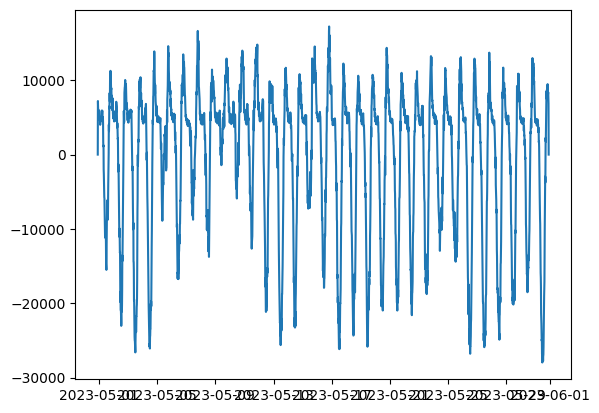

In [19]:
import matplotlib.pyplot as plt

df_for_plot = agg_df.filter(pl.col('cluster') == 22)

fig, ax = plt.subplots()
ax.plot(df_for_plot['readingdate'],df_for_plot['gross'])
plt.show()

In [242]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming your dataframe is named 'df' and contains a datetime index
input_window_size = (24*4)*7  # 24h (* PTUs) * days
target_window_size = 4*8 # Predict next PTUs (15 min interval of the next X hours)


scaler = StandardScaler()

df = df_for_plot

df = df[1:-1]
df = df[['gross']]
df[['gross']] = scaler.fit_transform(X=df[['gross']])

# Generate input and target sequences
sequences = []
targets = []
for i in range(len(df) - input_window_size - target_window_size + 1):
    input_sequence = df[i:i+input_window_size]
    target_sequence = df[i+input_window_size:i+input_window_size+target_window_size]
    sequences.append(input_sequence)
    targets.append(target_sequence)

# Convert sequences and targets to numpy arrays
X = np.array([sequence.to_numpy() for sequence in sequences])
y = np.array([target.to_numpy() for target in targets])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1817, 672, 1), (1817, 32, 1), (455, 672, 1), (455, 32, 1))

In [243]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
import numpy as np

MAX_EPOCHS = 5

lstm_model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    # Shape [batch, time, features] => [batch, time, lstm_units]
    LSTM(50, return_sequences=True),
    LSTM(50),
    # Shape => [batch, time, features]
    Dense(units=target_window_size)
])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=2,
                                                mode='min')

lstm_model.compile(loss='mean_squared_error',
            optimizer=tf.keras.optimizers.Adam(),
            metrics=['mean_absolute_error'])

# do not set batch size when using a keras PyDataset
history = lstm_model.fit(X_train, y_train, epochs=MAX_EPOCHS, callbacks=[early_stopping])

Epoch 1/5


57/57 ━━━━━━━━━━━━━━━━━━━━ 23s 332ms/step - loss: 0.8485 - mean_absolute_error: 0.7404
Epoch 2/5


/Users/katringrunert/Library/Caches/pypoetry/virtualenvs/neuro-symbolic-demand-forecasting-yu9KrGz6-py3.12/lib/python3.12/site-packages/keras/src/callbacks/early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error
  current = self.get_monitor_value(logs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 350ms/step - loss: 0.2244 - mean_absolute_error: 0.3438
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 366ms/step - loss: 0.1985 - mean_absolute_error: 0.3190
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 392ms/step - loss: 0.1587 - mean_absolute_error: 0.2827
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 392ms/step - loss: 0.1561 - mean_absolute_error: 0.2750


In [244]:
y_predict = lstm_model.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step


In [246]:
print(y_predict.reshape(y_test.shape).shape, y_test.shape, X_test.shape)

# y_predict = np.concatenate((X_test,y_predict.reshape(y_test.shape)), axis=1)
y_actual = np.concatenate((X_test,y_test), axis=1)

print(y_predict.shape, y_actual.shape, X_test.shape)

(455, 32, 1) (455, 32, 1) (455, 672, 1)
(455, 32) (455, 704, 1) (455, 672, 1)


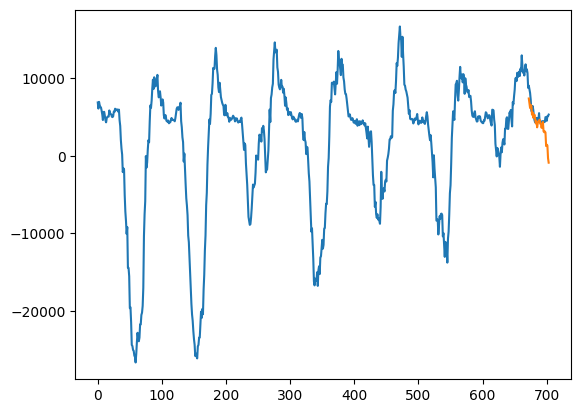

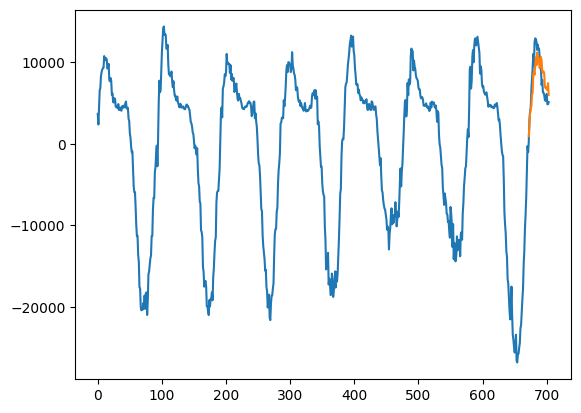

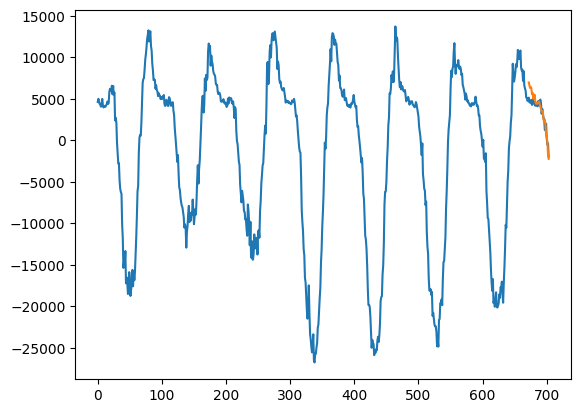

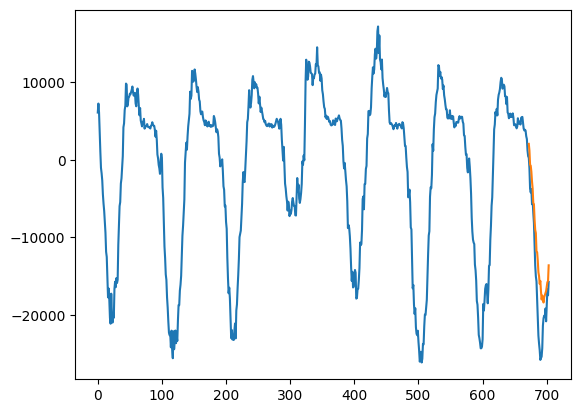

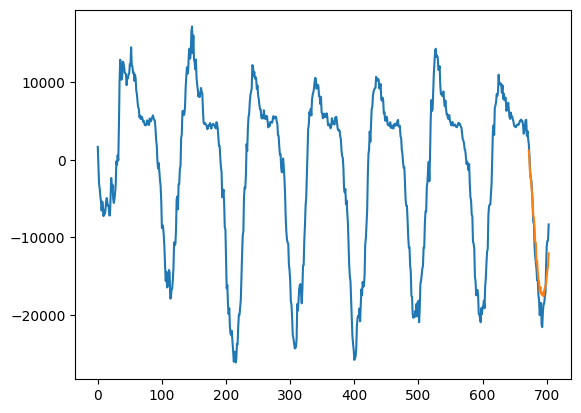

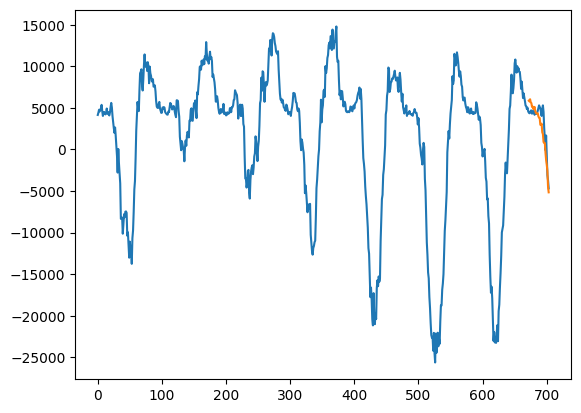

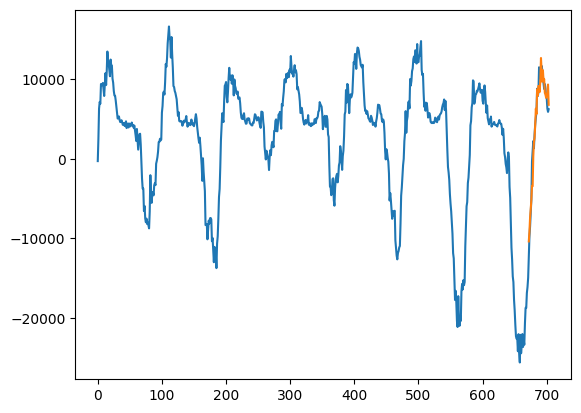

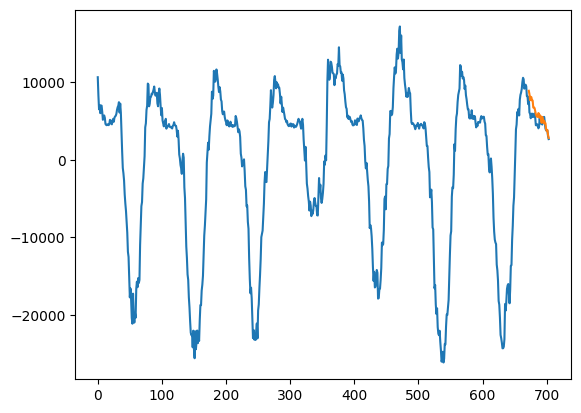

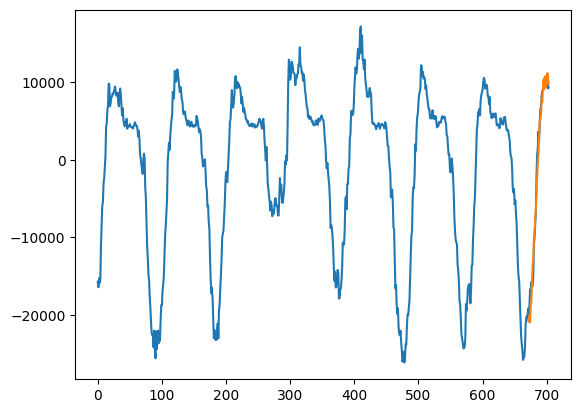

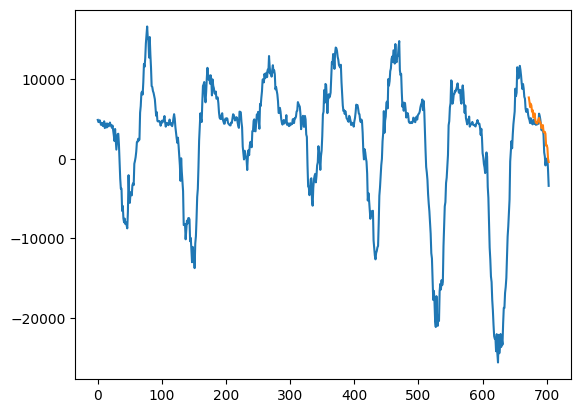

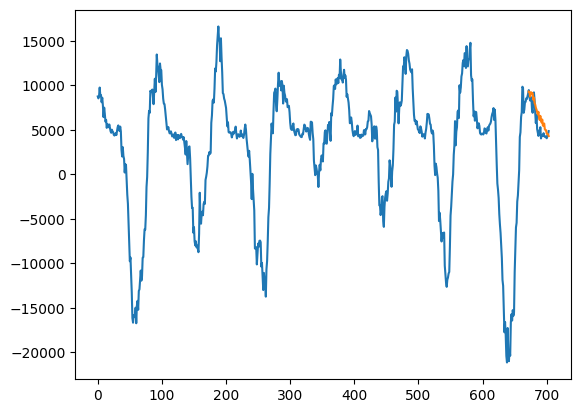

In [247]:
i = 1

for i in range(0, len(y_predict)):
    a = range(0, len(y_actual[i]))
    y_a = scaler.inverse_transform(y_actual[i])

    b=range(len(X_test[i]), len(y_actual[i]))

    y_p = scaler.inverse_transform(y_predict[i].reshape(len(y_predict[i]),1))

    plt.plot(a, y_a)

    plt.plot(b, y_p)
    plt.show()
    if i >= 10:
        break

---

In [33]:
from src.neuro_symbolic_demand_forecasting.helpers.window_generator import WindowGenerator
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

df = df_for_plot#.to_pandas()
# dropping first and last (both nulls)
df = df[1:-1]
df = df[['readingdate', 'gross']]
df[['gross']] = scaler.fit_transform(X=df[['gross']])

# df['readingdate'] = pd.to_numeric(df['readingdate'])
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

val_df

readingdate,gross
"datetime[ns, Etc/GMT-2]",f64
2023-05-22 16:45:00 +02,-0.798
2023-05-22 17:00:00 +02,-0.750
2023-05-22 17:15:00 +02,-0.454
2023-05-22 17:30:00 +02,-0.289
2023-05-22 17:45:00 +02,-0.204
…,…
2023-05-28 20:15:00 +02,0.894
2023-05-28 20:30:00 +02,0.915
2023-05-28 20:45:00 +02,1.099


In [34]:
wide_window =  WindowGenerator(input_width=24, label_width=1, shift=1, label_columns=['gross'], train_df=train_df, val_df=val_df, test_df=test_df)

window_gen = WindowGenerator(input_width=24, label_width=1, shift=1, label_columns=['gross'], train_df=train_df, val_df=val_df, test_df=test_df)

window = wide_window
window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24]
Label column name(s): ['gross']

### Linear Model
https://www.tensorflow.org/tutorials/structured_data/time_series#linear_model

In [35]:
MAX_EPOCHS = 20

def compile_and_fit(model, _window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(_window.train, epochs=MAX_EPOCHS,
                      validation_data=_window.val,
                      callbacks=[early_stopping])
  return history

In [37]:
import tensorflow as tf
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

print('Input shape:', window.example[0].shape)
print('Output shape:', linear(window.example[0]).shape)

history = compile_and_fit(linear, window)

val_performance = {}
performance = {}

val_performance['Linear'] = linear.evaluate(window.val, return_dict=True)
performance['Linear'] = linear.evaluate(window.test, verbose=0, return_dict=True)

Input shape: (32, 24, 2)
Output shape: (32, 24, 1)
Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan             
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mean_absolute_error: nan 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


ValueError: x and y must be the same size

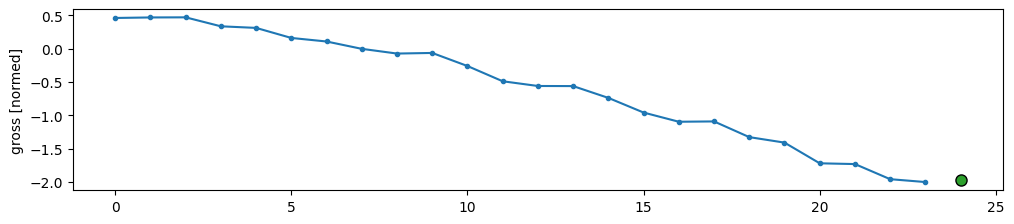

In [38]:
window.plot(linear, plot_col='gross')

### LSTM

In [206]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

lstm_model = Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    LSTM(48, return_sequences=True),
    # Shape => [batch, time, features]
    Dense(units=1)
])

print('Input shape:', window.example[0].shape)
print('Output shape:', lstm_model(window.example[0]).shape)

Input shape: (32, 24, 3)
Output shape: (32, 24, 1)


In [210]:
predictions = lstm_model.predict(wide_window.val)
predictions

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[[-0.05460599],
        [ 0.03050748],
        [ 0.04355292],
        ...,
        [ 0.04563217],
        [ 0.04563217],
        [ 0.04563217]],

       [[-0.05460599],
        [ 0.03050748],
        [ 0.04355292],
        ...,
        [ 0.04563217],
        [ 0.04563217],
        [ 0.04563217]],

       [[-0.05460599],
        [ 0.03050748],
        [ 0.04355292],
        ...,
        [ 0.04563217],
        [ 0.04563217],
        [ 0.04563217]],

       ...,

       [[-0.05460599],
        [ 0.03050748],
        [ 0.04355292],
        ...,
        [ 0.04563217],
        [ 0.04563217],
        [ 0.04563217]],

       [[-0.05460599],
        [ 0.03050748],
        [ 0.04355292],
        ...,
        [ 0.04563217],
        [ 0.04563217],
        [ 0.04563217]],

       [[-0.05460599],
        [ 0.03050748],
        [ 0.04355292],
        ...,
        [ 0.04563217],
        [ 0.04563217],
        [ 0.04563217]]], dtype=float32)

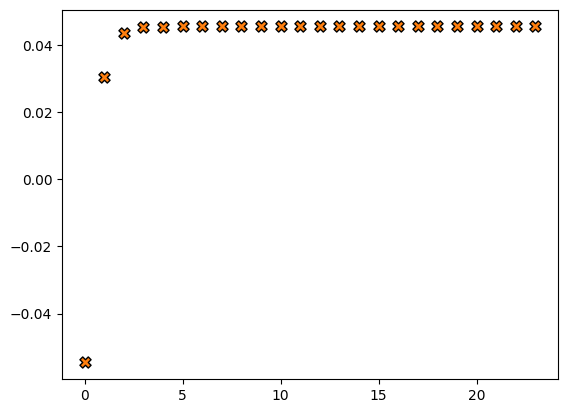

In [220]:
plt.scatter(range(0,24,1), predictions[1, :],marker='X', edgecolors='k', label='Predictions',c='#ff7f0e', s=64)


Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.9239 - mean_absolute_error: 0.7712 - val_loss: 1.1751 - val_mean_absolute_error: 0.8966
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.9254 - mean_absolute_error: 0.8054 - val_loss: 1.1750 - val_mean_absolute_error: 0.8955
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.9108 - mean_absolute_error: 0.7976 - val_loss: 1.1686 - val_mean_absolute_error: 0.8972
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.9190 - mean_absolute_error: 0.8048 - val_loss: 1.1756 - val_mean_absolute_error: 0.8959
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.9278 - mean_absolute_error: 0.8091 - val_loss: 1.1737 - val_mean_absolute_error: 0.8961
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1381 - mean_absolute_error: 0.8913


ValueError: x and y must be the same size

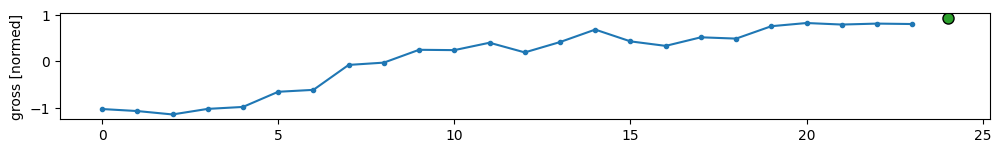

In [207]:
history = compile_and_fit(lstm_model, wide_window)

val_performance = {}
performance = {}

val_performance['LSTM'] = lstm_model.evaluate(window.val, return_dict=True)
performance['LSTM'] = lstm_model.evaluate(window.test, verbose=0, return_dict=True)

window.plot(lstm_model, plot_col='gross', max_subplots=5)

In [112]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

num_samples = 1000
sequence_length = 24

X_train = np.random.rand(num_samples, sequence_length)
y_train = np.zeros((num_samples,))

for i in range(num_samples):
    y_train[i] = X_train[i, 20]

y_train = y_train[4:]

X_train = np.reshape(X_train[:-4], (X_train.shape[0]-4, sequence_length, 1))

# Build the Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=4))

# Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the Model
model.fit(X_train, y_train, epochs=10, batch_size=4)

# Make Predictions
# Generate dummy data for X_test (assuming similar shape)
X_test = np.random.rand(10, sequence_length)  # Example with 10 samples
X_test = np.reshape(X_test, (X_test.shape[0], sequence_length, 1))

# Predict the next 4 hours
predictions = model.predict(X_test)

# Print the predictions
print(predictions)

Epoch 1/10


249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1311 - mean_absolute_error: 0.2974
Epoch 2/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0916 - mean_absolute_error: 0.2599
Epoch 3/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0831 - mean_absolute_error: 0.2455
Epoch 4/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0867 - mean_absolute_error: 0.2525
Epoch 5/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0894 - mean_absolute_error: 0.2590
Epoch 6/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0871 - mean_absolute_error: 0.2505
Epoch 7/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0855 - mean_absolute_error: 0.2517
Epoch 8/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0872 - mean_absolute_error: 0.2532
Epoch 9/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0866 - mean_absolute_error: 0.2543
Epoch 10/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0878 - mean_absolute_error: 0.2550
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
[

In [113]:
predictions.shape, X_test.shape

((10, 4), (10, 24, 1))